In [1]:
#Importing packages
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import math

In [2]:
# Reading in data we cleaned
df = pd.read_csv('data/exported_data.csv')

In [3]:
df.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",26141,14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",26025,12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",26023,13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",26155,10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",26097,10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935


In [4]:
# Renaming columns so they are more general - can apply to our 2020 data when
# we run the models on it
df = df.rename(columns = {'Democrats 2016':'Democrats Target Year', 'Republicans 2016':'Republicans Target Year',
                         'Democrats 2012':'Democrats Previous Year', 'Republicans 2012':'Republicans Previous Year',
                         'Average Unemployment % 2016':'Average Unemployment %'})


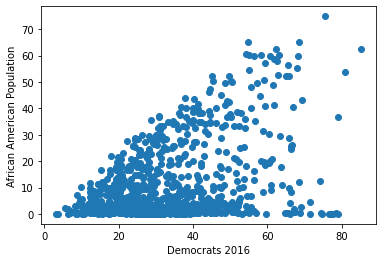

In [5]:
# Looking at some plots of features against our target
fig, ax = plt.subplots()
plt.scatter(df['Democrats Target Year'], df['African American Population'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("African American Population")
plt.show()

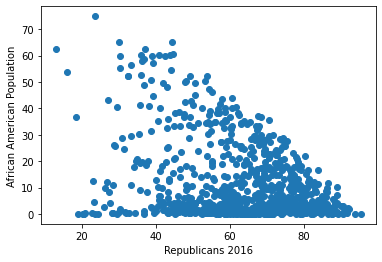

In [6]:
fig, ax = plt.subplots()
plt.scatter(df['Republicans Target Year'], df['African American Population'])
ax.set_xlabel("Republicans 2016")
ax.set_ylabel("African American Population")
plt.show()

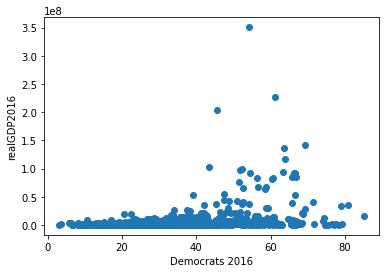

In [7]:
fig, ax = plt.subplots()
plt.scatter(df['Democrats Target Year'], df['realGDP2016'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("realGDP2016")
plt.show()

In [8]:
# tranforms gdp so its more linear
df['log_gdp'] = np.log10(df['realGDP2016'])

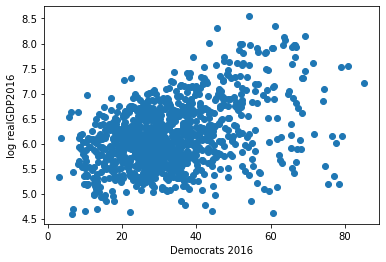

In [9]:
fig, ax = plt.subplots()
plt.scatter(df['Democrats Target Year'], df['log_gdp'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("log realGDP2016")
plt.show()

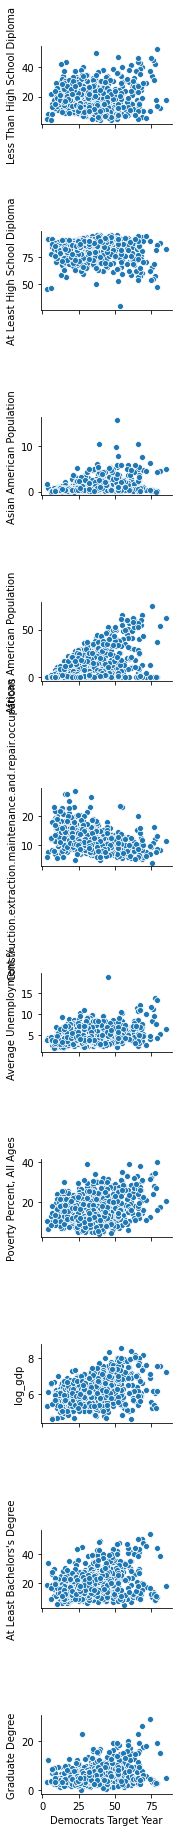

In [10]:
sns.pairplot(data=df,
                  x_vars=['Democrats Target Year'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                          "At Least Bachelors's Degree", 
                         'Graduate Degree'])

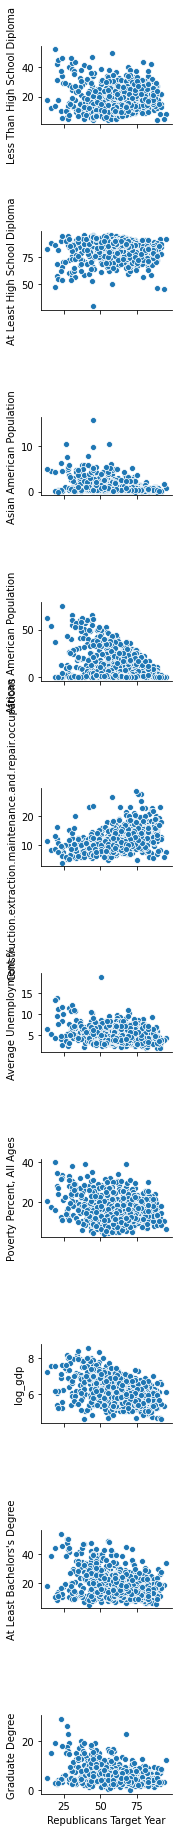

In [11]:
sns.pairplot(data=df,
                  x_vars=['Republicans Target Year'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp',
                          "At Least Bachelors's Degree" , 'Graduate Degree'])

In [12]:
df.head()

,Democrats Target Year,Republicans Target Year,Democrats Previous Year,Republicans Previous Year,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment %,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",26141,14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886,5.594917
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",26025,12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215,6.747800
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",26023,13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171,6.095234
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",26155,10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465,6.204688
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",26097,10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935,5.789665


In [13]:
# This is our set of features WITHOUT including the percentage of vote share each party won in 2012 in each 
# county. Through this model we are able to see how effective external factors are in predicting the voting
# tendencies of counties. 
df_features = df[['Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]

In [14]:
# Creating train test split, using all variables
x_train, x_test, y_train, y_test = train_test_split(df_features, df['Democrats Target Year'],
                                                    test_size=0.2,shuffle=True)

In [15]:
# SIMPLE linear regression without cross validation
model_baseline = LinearRegression()
model_baseline.fit(x_train,y_train)
predictions = model_baseline.predict(x_test)
test_score = model_baseline.score(x_test,y_test)
train_score = model_baseline.score(x_train,y_train)
print("Train score: "+str(train_score))
print("Test score: "+str(test_score))

Train score: 0.5870798876354086
Test score: 0.44324363916839327


In [16]:
mse_baseline = mean_squared_error(y_test,predictions)
print("Mean squared error: "+str(mse_baseline))


Mean squared error: 91.91387049183159


In [17]:
#Now lets use cross validation to get a better estimate of test score 
scores = cross_validate(model_baseline,x_train,y_train,cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 


In [18]:
#defining functions to print out scores and mses for cross validation sets
def print_r2(s):
    print("Training R^2: "+str(s['train_r2']))
    print("\nValidation R^2: "+str(s['test_r2']))
    
def print_mse(s):
    print("Training negative MSE: "+str(s['train_neg_mean_squared_error']))
    print("\nValidation negative MSE: "+str(s['test_neg_mean_squared_error']))

In [19]:
print_r2(scores)

Training R^2: [0.58906488 0.59028288 0.59203371 0.60765164 0.57568382]

Validation R^2: [0.52667221 0.55409579 0.53440263 0.45559327 0.58192804]


In [20]:
print_mse(scores)

Training negative MSE: [-83.51334419 -82.574629   -83.44753563 -80.31740864 -80.62796045]

Validation negative MSE: [ -90.88373402  -88.42688429  -85.07437129 -101.05615603  -96.99183593]


While this model does not give good results in terms of the r^2 values and the mse, it serves as a good baseline to compare our next models to. Using just demographic and economic characteristics of counties can explain about 55% of the variation in the percentage of votes that the democratic candidate will recieve in that county

In [21]:
# this set of features includes all from above as well as the percentage vote share for each party in 2012
df_features2 = df[['Democrats Previous Year', 'Republicans Previous Year','Less Than High School Diploma',
                   'At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per','65tot_per',
             '65M_per','65F_per']]

In [22]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_features2, df['Democrats Target Year'],
                                                    test_size=0.2,shuffle=True)
model_vote = LinearRegression()
model_vote.fit(x_train2,y_train2)
scores2 = cross_validate(model_vote,x_train2,y_train2,cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 


In [23]:
print_r2(scores2)

Training R^2: [0.97801758 0.98284408 0.9811159  0.97853118 0.97874869]

Validation R^2: [0.9841668  0.95944162 0.97230354 0.98376846 0.98300539]


In [24]:
print_mse(scores2)

Training negative MSE: [-4.05120797 -3.58100479 -3.87531569 -4.103507   -4.07843987]

Validation negative MSE: [-3.84716693 -5.77866167 -4.45002308 -3.52301917 -3.6230014 ]


We can see this model is significantly better than our previous model as is expected.

In [25]:
# now let's see how a model preforms with just the percentage vote share from 2012 as our features
df_features3 = df[['Democrats Previous Year', 'Republicans Previous Year']]
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_features3, df['Democrats Target Year'], 
                                                    test_size=0.2,shuffle=True)
model_onlyvote = LinearRegression()
model_onlyvote.fit(x_train3,y_train3)
scores3 = cross_validate(model_onlyvote,x_train3,y_train3,cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 



In [26]:
print_r2(scores3)

Training R^2: [0.87645956 0.88415849 0.8858498  0.87225608 0.87772919]

Validation R^2: [0.88527732 0.85680961 0.84463687 0.90545552 0.88351615]


In [27]:
print_mse(scores3)

Training negative MSE: [-22.17312608 -22.03378571 -22.19419613 -23.70837229 -22.32566835]

Validation negative MSE: [-24.314347   -24.50902984 -23.8639339  -17.90013841 -23.3659197 ]


We can see that this model outpreforms our original model that did not include the previous percentage vote share but it preforms worse than the model that contains all the demographic and economic features as well as the percentage vote share. This indicates that we should investigate using a combination of these features and that the demographic and economic features do contribute to increasing our models accuracy. 

In [28]:
# Now we are investigating a less complex model 
# We will drop the percentage of population in certain age groups broken down by gender, but include the 
# overall percentages for age groups still
df_features4 = df[['Democrats Previous Year', 'Republicans Previous Year','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train_main, x_test_main, y_train_main, y_test_main = train_test_split(df_features4, df['Democrats Target Year'], 
                                                        test_size=0.2, shuffle=True)
model_4 = LinearRegression()
model_4.fit(x_train_main,y_train_main)
scores_4 = cross_validate(model_4,x_train_main,y_train_main,cv=5,                    
                          scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)



In [29]:
print_r2(scores_4)

Training R^2: [0.98026859 0.98002725 0.98086546 0.97919902 0.97984367]

Validation R^2: [0.97827854 0.97900995 0.9731273  0.98091456 0.97907672]


In [30]:
print_mse(scores_4)

Training negative MSE: [-3.7978549  -4.07557904 -4.09652583 -4.0463521  -3.87508578]

Validation negative MSE: [-4.94182148 -3.8086456  -3.72283696 -4.19059765 -4.72419122]


Comparing the r^2s and the mse values of this model to the one that included all the features, we can see that they are very very similar. This indicates to us that this, less complex, model preforms about the same. Thus we will precede with this subset of features because it is generally preferable to use a less complex model(sparsity). 

In [31]:
# Now we will break it down by geographical subsets to see if we can improve scores
# first we will look at a group of states in the midwest
midwest = ["Michigan","Minnesota","Ohio","Wisconsin","Iowa"]
df_midwest = df[df.State.isin(midwest)]
df_midwest.head()

,Democrats Target Year,Republicans Target Year,Democrats Previous Year,Republicans Previous Year,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment %,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",26141,14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886,5.594917
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",26025,12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215,6.747800
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",26023,13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171,6.095234
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",26155,10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465,6.204688
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",26097,10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935,5.789665


In [32]:
df_features_midwest = df_midwest[['Democrats Previous Year', 'Republicans Previous Year','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_midwest, df_midwest['Democrats Target Year'], 
                                                    test_size=0.2,shuffle=True)
model_midwest = LinearRegression()
scores_midwest = cross_validate(model_midwest,x_train,y_train,cv=5,
                                scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)   

In [33]:
print_r2(scores_midwest)

Training R^2: [0.96683632 0.96291722 0.96192632 0.96528074 0.9647292 ]

Validation R^2: [0.94225897 0.96224101 0.96271354 0.94998222 0.94098874]


In [34]:
print_mse(scores_midwest)

Training negative MSE: [-3.18172556 -3.37277814 -3.94893872 -2.88795743 -3.34275274]

Validation negative MSE: [-4.93225934 -3.78134487 -1.99939698 -6.78026572 -5.0104775 ]


In [35]:
# now we will look at southern states
south = ["Florida","Texas","Georgia","Arizona"]
df_south = df[df.State.isin(south)]
df_south.head()

,Democrats Target Year,Republicans Target Year,Democrats Previous Year,Republicans Previous Year,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment %,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
83,47.494950,48.995648,47.769323,51.381820,Florida,"Duval County, Florida",12031,12.8,87.2,58.00,3.80,28.85,9.80,4.9,14.5,54932423,24.9,8.0,0.119038,0.061204,0.057834,0.375322,0.184902,0.190420,0.333032,0.158291,0.174741,0.172608,0.073872,0.098736,7.739829
84,28.952191,68.615692,33.704786,65.217391,Florida,"Franklin County, Florida",12037,21.7,78.3,80.20,0.70,12.65,15.35,4.3,23.1,326130,18.8,5.5,0.086921,0.056398,0.030524,0.326258,0.219729,0.106529,0.323833,0.172226,0.151607,0.262988,0.132909,0.130079,5.513391
85,47.474970,49.916507,53.540280,45.682655,Florida,"St. Lucie County, Florida",12111,16.6,83.4,63.45,1.55,17.50,13.65,5.8,17.0,7824890,17.8,6.3,0.092861,0.048053,0.044807,0.279555,0.137036,0.142519,0.335787,0.160468,0.175319,0.291796,0.135928,0.155868,6.893478
86,60.384573,35.744045,58.681188,40.438589,Florida,"Orange County, Florida",12095,13.1,86.9,47.85,4.55,19.20,9.60,4.3,16.3,81146561,30.3,9.6,0.139616,0.068430,0.071186,0.399467,0.199577,0.199890,0.315060,0.153339,0.161721,0.145857,0.063567,0.082290,7.909270
87,24.169284,73.673334,28.577568,70.640309,Florida,"Bradford County, Florida",12007,23.6,76.4,73.40,0.50,20.20,13.95,4.2,18.6,608141,8.6,3.9,0.097987,0.058848,0.039139,0.343118,0.211938,0.131180,0.334644,0.182257,0.152388,0.224251,0.097566,0.126685,5.784004


In [36]:
df_features_south = df_south[['Democrats Previous Year', 'Republicans Previous Year','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_south, df_south['Democrats Target Year'], 
                                                    test_size=0.2,shuffle=True)
model_south = LinearRegression()
scores_south = cross_validate(model_south,x_train,y_train,cv=5,
                              scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)   


In [37]:
print_r2(scores_south)


Training R^2: [0.9892258  0.98800621 0.98981124 0.98850549 0.98726994]

Validation R^2: [0.98015689 0.98900978 0.97937559 0.98450215 0.99032054]


In [38]:
print_mse(scores_south)

Training negative MSE: [-2.76174379 -3.00336041 -2.67760593 -2.98555218 -3.00045293]

Validation negative MSE: [-4.72517958 -2.89674468 -4.39105841 -3.50357579 -3.09500853]


In [39]:
# Now northeast states
northeast = ["North Carolina","Pennsylvania"]
df_northeast = df[df.State.isin(northeast)]
df_northeast.head()

,Democrats Target Year,Republicans Target Year,Democrats Previous Year,Republicans Previous Year,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment %,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
150,59.392554,37.411176,60.158844,38.818969,Pennsylvania,"Delaware County, Pennsylvania",42045,9.5,90.5,72.80,4.50,18.55,7.75,4.9,10.8,29291807,34.7,14.5,0.130446,0.065478,0.064967,0.316355,0.154363,0.161992,0.352134,0.167976,0.184158,0.201066,0.084142,0.116924,7.466746
151,28.607199,68.271853,38.857778,59.684362,Pennsylvania,"Wayne County, Pennsylvania",42127,13.3,86.7,92.65,0.65,2.55,13.75,5.7,13.7,1456959,17.9,7.3,0.086419,0.047789,0.038630,0.262029,0.153723,0.108306,0.373482,0.195266,0.178217,0.278069,0.134349,0.143719,6.163447
152,24.658451,70.699634,36.813797,61.512849,Pennsylvania,"Bradford County, Pennsylvania",42015,14.6,85.4,96.85,0.55,0.45,10.60,6.5,11.5,5160201,15.7,5.1,0.096000,0.048956,0.047043,0.268766,0.134068,0.134698,0.373237,0.186576,0.186661,0.261997,0.122212,0.139785,6.712667
153,50.217053,46.819155,63.090343,35.795541,Pennsylvania,"Lackawanna County, Pennsylvania",42069,12.5,87.5,91.45,1.35,1.95,8.30,5.6,14.1,8666241,23.7,9.0,0.113048,0.055507,0.057541,0.297003,0.149153,0.147850,0.347751,0.169513,0.178239,0.242198,0.102502,0.139695,6.937831
154,29.581000,67.329267,40.063774,58.095694,Pennsylvania,"Cambria County, Pennsylvania",42021,12.4,87.6,93.70,0.55,3.35,10.05,6.8,15.6,4476405,17.5,6.5,0.114567,0.059572,0.054995,0.262625,0.133809,0.128816,0.357793,0.178864,0.178929,0.265015,0.114493,0.150522,6.650929


In [40]:
df_features_northeast = df_northeast[['Democrats Previous Year', 'Republicans Previous Year','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_northeast, df_northeast['Democrats Target Year'], 
                                                    test_size=0.2,shuffle=True)
model_ne = LinearRegression()
scores_northeast = cross_validate(model_ne,x_train,y_train,cv=5,
                                  scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 

In [41]:
print_r2(scores_northeast)

Training R^2: [0.9840116  0.98695094 0.98464279 0.98352649 0.98400991]

Validation R^2: [0.9782749  0.93319894 0.97118075 0.98285946 0.97833339]


In [42]:
print_mse(scores_northeast)

Training negative MSE: [-2.29981738 -2.0731005  -2.43096765 -2.27267452 -2.4460583 ]

Validation negative MSE: [-3.84532571 -6.64388467 -3.2441668  -3.47028756 -3.02965924]


In general, it seems that subsetting by geographical location of states does not change the r^2 or the mse values very much. The model for the midwest subset did seem to drop in accuracy a little but it is difficult to see if these changes are statistically significant or not. This indicates that states in different geographical areas are not different enough to skew the accuracy of a model trained across many different regions. We can investigate how these geographical models preforms on data from 2020 to get further information here.

In [43]:
# now lets visualize the predictions against the true values
# I will use the model on all the states (i.e. not the geographical subsets)

model_5 = LinearRegression()
y_pred = cross_val_predict(model_5, x_train_main, y_train_main, cv=5)


In [44]:
#Running our model on all the states on the test set from that split
model_4.fit(x_train_main,y_train_main)
y_pred_test = model_4.predict(x_test_main)




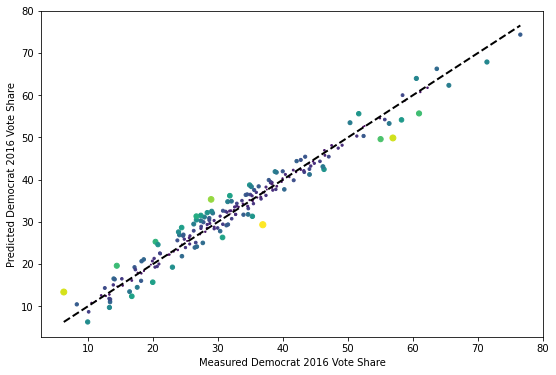

In [45]:
#Scatter plot for the test set
diff = abs(y_test_main-y_pred_test)*5
fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(y_test_main, y_pred_test, s = diff, c = diff)
ax.plot([y_test_main.min(), y_test_main.max()], [y_test_main.min(), y_test_main.max()], 'k--', lw=2)
ax.set_xlabel('Measured Democrat 2016 Vote Share')
ax.set_ylabel('Predicted Democrat 2016 Vote Share')
plt.show()

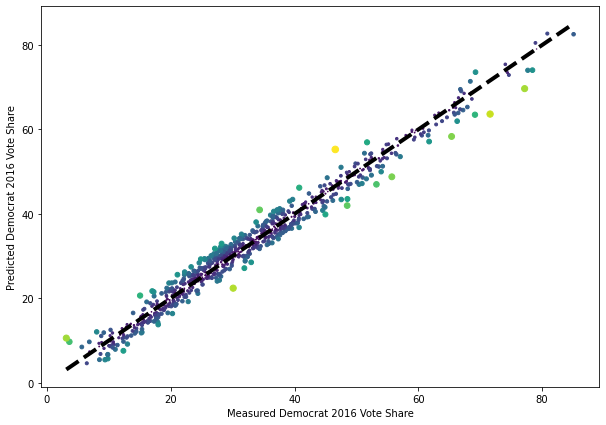

In [46]:
#Scatter plot for cross validation predictions
diff = abs(y_train_main-y_pred)*5
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(y_train_main, y_pred, s = diff, c = diff)
ax.plot([y_train_main.min(), y_train_main.max()], [y_train_main.min(), y_train_main.max()], 'k--', lw=4)
ax.set_xlabel('Measured Democrat 2016 Vote Share')
ax.set_ylabel('Predicted Democrat 2016 Vote Share')
plt.show()

Text(0, 0.5, 'Frequency')

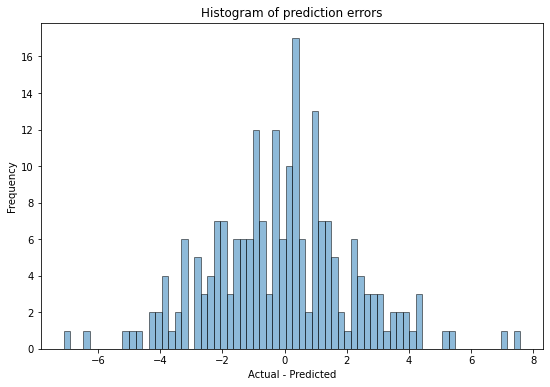

In [47]:
#Histogram of prediction errors for test set
diff = y_test_main-y_pred_test
fig, ax = plt.subplots(figsize = (9,6))
counts,bins,patches = ax.hist(diff,bins = 70, histtype = 'bar', ec = 'black', alpha = 0.5)
plt.title('Histogram of prediction errors')
plt.xlabel('Actual - Predicted')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

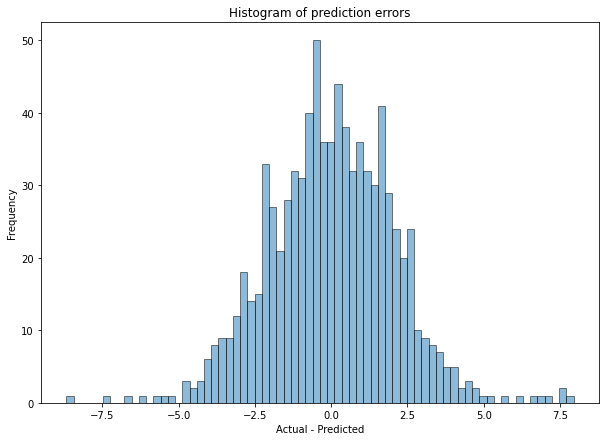

In [48]:
#Histogram of prediction errors for cross validation
diff = y_train_main-y_pred
fig, ax = plt.subplots(figsize = (10,7))
counts,bins,patches = ax.hist(diff,bins = 70, histtype = 'bar', ec = 'black', alpha = 0.5)
#ax.set_xticks(bins)
#plt.xticks(rotation = 'vertical')
plt.title('Histogram of prediction errors')
plt.xlabel('Actual - Predicted')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

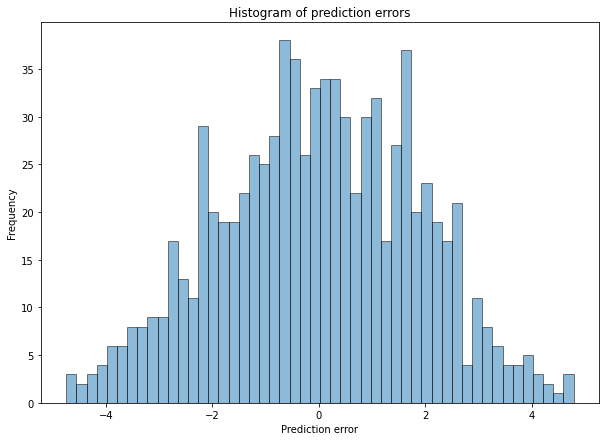

In [49]:
diff_2 = [x for x in diff if (abs(x)) < 5]
fig, ax = plt.subplots(figsize = (10,7))
counts,bins,patches = ax.hist(diff_2,bins = 50, histtype = 'bar', ec = 'black', alpha = 0.5)
#ax.set_xticks(bins)
#plt.xticks(rotation = 'vertical')
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

In [50]:
#import statistics
diff_sq = (y_train_main-y_pred)
mean = np.mean(diff_sq)
se = np.std(diff_sq)
interval = 1.96*se
lower_bound = mean - interval
upper_bound = mean + interval
print("Confidence interval: ["+str(lower_bound)+", "+str(upper_bound)+"]")

Confidence interval: [-4.0480976230638746, 4.060110395669147]


In [51]:
# Running our models from above on the test sets from above and 
# calculating the MSE so we have something to compare the 
# MSEs below on

vote_preds = model_vote.predict(x_test2)
mse_vote = mean_squared_error(y_test2,vote_preds)

onlyvote_preds = model_onlyvote.predict(x_test3)
mse_onlyvote = mean_squared_error(y_test3,onlyvote_preds)

main_preds = model_4.predict(x_test_main)
mse_main = mean_squared_error(y_test_main, main_preds)



In [52]:
# read in 2020 data
df2020_small = pd.read_csv('data/exported_data2020small.csv')
df2020_small.head()

,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,African American Population,Asian American Population,Average Unemployment %,"Poverty Percent, All Ages",Graduate Degree,At Least Bachelors's Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,Republicans Previous Year,Democrats Previous Year,log_gdp,Geographic Area Name_x,id,Republicans Target Year,Democrats Target Year
0,0.179969,0.314415,0.210177,0.010030,0.002226,12.7,42.8,0.053024,0.056851,0.124147,0.061416,0.062731,0.331707,0.174012,0.157695,0.328104,0.157943,0.170161,0.216042,0.097766,0.118276,0.285,0.654,6.396234,"Apache County, Arizona",4001,0.327,0.661
1,0.123738,0.271272,0.859079,0.048943,0.022196,6.6,27.6,0.089437,0.135565,0.103124,0.057828,0.045296,0.300902,0.162114,0.138789,0.301701,0.146651,0.155050,0.294273,0.140396,0.153877,0.580,0.354,6.661749,"Cochise County, Arizona",4003,0.582,0.399
2,0.058941,0.224030,0.638776,0.009507,0.019028,9.7,38.0,0.145664,0.178253,0.258198,0.117506,0.140692,0.314314,0.162779,0.151535,0.264822,0.129665,0.135157,0.162666,0.077498,0.085168,0.369,0.563,6.830247,"Coconino County, Arizona",4005,0.370,0.610
3,0.121441,0.239276,0.790820,0.059332,0.042873,7.5,21.0,0.122930,0.201831,0.121160,0.062066,0.059094,0.361995,0.182963,0.179032,0.314009,0.153061,0.160948,0.202836,0.091442,0.111394,0.491,0.457,8.361390,"Maricopa County, Arizona",4013,0.482,0.503
4,0.136021,0.347913,0.889599,0.007051,0.009063,9.1,29.3,0.048427,0.081868,0.071982,0.038310,0.033672,0.232595,0.123774,0.108821,0.322675,0.157243,0.165432,0.372748,0.185424,0.187324,0.737,0.222,6.716086,"Mohave County, Arizona",4015,0.750,0.237


In [53]:
#Transforming columns so they match scale of 2016 data
df2020_small['Republicans Previous Year'] = df2020_small['Republicans Previous Year']*100
df2020_small['Democrats Previous Year'] = df2020_small['Democrats Previous Year'] *100
df2020_small['Republicans Target Year'] = df2020_small['Republicans Target Year']*100
df2020_small['Democrats Target Year'] = df2020_small['Democrats Target Year']*100
df2020_small.head()

,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,African American Population,Asian American Population,Average Unemployment %,"Poverty Percent, All Ages",Graduate Degree,At Least Bachelors's Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,Republicans Previous Year,Democrats Previous Year,log_gdp,Geographic Area Name_x,id,Republicans Target Year,Democrats Target Year
0,0.179969,0.314415,0.210177,0.010030,0.002226,12.7,42.8,0.053024,0.056851,0.124147,0.061416,0.062731,0.331707,0.174012,0.157695,0.328104,0.157943,0.170161,0.216042,0.097766,0.118276,28.5,65.4,6.396234,"Apache County, Arizona",4001,32.7,66.1
1,0.123738,0.271272,0.859079,0.048943,0.022196,6.6,27.6,0.089437,0.135565,0.103124,0.057828,0.045296,0.300902,0.162114,0.138789,0.301701,0.146651,0.155050,0.294273,0.140396,0.153877,58.0,35.4,6.661749,"Cochise County, Arizona",4003,58.2,39.9
2,0.058941,0.224030,0.638776,0.009507,0.019028,9.7,38.0,0.145664,0.178253,0.258198,0.117506,0.140692,0.314314,0.162779,0.151535,0.264822,0.129665,0.135157,0.162666,0.077498,0.085168,36.9,56.3,6.830247,"Coconino County, Arizona",4005,37.0,61.0
3,0.121441,0.239276,0.790820,0.059332,0.042873,7.5,21.0,0.122930,0.201831,0.121160,0.062066,0.059094,0.361995,0.182963,0.179032,0.314009,0.153061,0.160948,0.202836,0.091442,0.111394,49.1,45.7,8.361390,"Maricopa County, Arizona",4013,48.2,50.3
4,0.136021,0.347913,0.889599,0.007051,0.009063,9.1,29.3,0.048427,0.081868,0.071982,0.038310,0.033672,0.232595,0.123774,0.108821,0.322675,0.157243,0.165432,0.372748,0.185424,0.187324,73.7,22.2,6.716086,"Mohave County, Arizona",4015,75.0,23.7


In [54]:
#Filling NaN values with the mean...investigate other approaches here
df2020_small['White (Not Latino) Population'] = df2020_small['White (Not Latino) Population'].fillna(df2020_small['White (Not Latino) Population'].mean())

df2020_small['African American Population'] =df2020_small['African American Population'].fillna(df2020_small['African American Population'].mean())

df2020_small['Asian American Population'] = df2020_small['Asian American Population'].fillna(df2020_small['Asian American Population'].mean())


In [55]:
#Defining set of features and target variable for the 2020 data to run our models on
x_test2020 = df2020_small[['Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]


y_test2020 = df2020_small['Democrats Target Year']


In [56]:
#Doubling checking for null values
x_test2020.isnull().any()

Less Than High School Diploma    False
At Least High School Diploma     False
White (Not Latino) Population    False
Asian American Population        False
African American Population      False
Average Unemployment %           False
Poverty Percent, All Ages        False
log_gdp                          False
At Least Bachelors's Degree      False
Graduate Degree                  False
1824tot_per                      False
1824M_per                        False
1824F_per                        False
2544tot_per                      False
2544M_per                        False
2544F_per                        False
4564tot_per                      False
4564M_per                        False
4564F_per                        False
65tot_per                        False
65M_per                          False
65F_per                          False
dtype: bool

In [57]:
df_null_ratios = df2020_small.isnull().sum()/len(df2020_small)*100
print(df_null_ratios)

Less Than High School Diploma    0.0
At Least High School Diploma     0.0
White (Not Latino) Population    0.0
African American Population      0.0
Asian American Population        0.0
Average Unemployment %           0.0
Poverty Percent, All Ages        0.0
Graduate Degree                  0.0
At Least Bachelors's Degree      0.0
1824tot_per                      0.0
1824M_per                        0.0
1824F_per                        0.0
2544tot_per                      0.0
2544M_per                        0.0
2544F_per                        0.0
4564tot_per                      0.0
4564M_per                        0.0
4564F_per                        0.0
65tot_per                        0.0
65M_per                          0.0
65F_per                          0.0
Republicans Previous Year        0.0
Democrats Previous Year          0.0
log_gdp                          0.0
Geographic Area Name_x           0.0
id                               0.0
Republicans Target Year          0.0
D

In [58]:
#Make predictions on the 2020 data using our baseline model trained with 2016 data
baseline2020_preds = model_baseline.predict(x_test2020)


In [59]:
#Calculating MSE for these predictions
errors = (baseline2020_preds - y_test2020)**2
mse = np.mean(errors)
mse

365.64210725500544

In [60]:
# baseline mse from original model (2016 test data)
mse_baseline

91.91387049183159

In [61]:
#Add in previous year vote share to features
x_test2020_vote = df2020_small[['Democrats Previous Year', 'Republicans Previous Year',
                                'Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]


y_test2020_vote = df2020_small['Democrats Target Year']



In [62]:
# Making predictions on the 2020 data using our vote model trained on 2016 data
main2020_preds = model_vote.predict(x_test2020_vote)

In [63]:
#Calculating MSE for this 
errors3 = (main2020_preds - y_test2020_vote)**2
mse3 = np.mean(errors3)
mse3

61.58533353238008

In [64]:
# original mse from this model (2016 test data)
mse_vote

4.828889363118146

In [65]:
#Using only previous year vote share as features
x_test_onlyvote = df2020_small[['Democrats Previous Year', 'Republicans Previous Year']]
y_test2020_onlyvote = df2020_small['Democrats Target Year']



In [66]:
# Making predictions on the 2020 data using our only vote model trained on 2016 data
vote_only_preds = model_onlyvote.predict(x_test_onlyvote)


In [67]:
#Calculating MSE for this 
errors4 = (vote_only_preds - y_test2020_onlyvote)**2
mse4 = np.mean(errors4)
mse4

384.18129904845523

In [68]:
# original mse from this model (2016 test data)
mse_onlyvote

24.56875374559974

In [69]:
#Our main set of features
x_test2020_main = df2020_small[['Democrats Previous Year', 'Republicans Previous Year',
                                'Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]

y_test2020_main = df2020_small['Democrats Target Year']

In [70]:
# Making predictions on the 2020 data using our main model trained on 2016 data
main2020_preds = model_4.predict(x_test2020_main)


In [71]:
#Calculating MSE for this
errors5 = (main2020_preds - y_test2020_main)**2
mse5 = np.mean(errors5)
mse5

26.239489525821153

In [72]:
# original mse from this model (2016 test data)
mse_main

5.211282540624779

In [73]:
df2020full = pd.read_csv('data/exported_data2020full.csv')
df2020full.head()

,Republicans Previous Year,Democrats Previous Year,Republicans Target Year,Democrats Target Year,White (Not Latino) Population,African American Population,Asian American Population,"Poverty Percent, All Ages",Average Unemployment %,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,0.653,0.300,0.697,0.286,96.6,0.3,0.4,9.5,3.0,0.081173,0.042732,0.038441,0.286251,0.146612,0.139639,0.337922,0.172895,0.165028,0.294654,0.130341,0.164313,5.612191
1,0.669,0.271,0.708,0.273,96.8,0.4,0.6,11.2,4.2,0.077598,0.042135,0.035463,0.266503,0.135534,0.130969,0.356742,0.179424,0.177317,0.299157,0.141854,0.157303,5.395475
2,0.763,0.207,0.811,0.179,96.6,0.4,0.2,23.8,7.5,0.097295,0.048079,0.049216,0.295059,0.143859,0.151201,0.365497,0.182227,0.183269,0.242149,0.114016,0.128132,5.827892
3,0.663,0.299,0.663,0.322,89.5,1.4,0.7,8.8,4.9,0.115262,0.057970,0.057292,0.268496,0.136554,0.131942,0.353205,0.173486,0.179720,0.263037,0.120104,0.142933,6.549042
4,0.592,0.374,0.623,0.366,90.7,2.7,0.5,13.0,8.1,0.063148,0.035920,0.027228,0.220815,0.133145,0.087670,0.365013,0.190134,0.174879,0.351025,0.176836,0.174188,5.671984


In [74]:
#Retraining our 2016 model WITHOUT education features

#Full set of features minus edu (with gendered breakdown of ages)
df_features_without_ed = df[['Democrats Previous Year', 'Republicans Previous Year',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                '1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]

In [75]:
x_train_without_ed, x_test_without_ed, y_train_without_ed, y_test_without_ed = train_test_split(df_features_without_ed, df['Democrats Target Year'],
                                                    test_size=0.2,shuffle=True)

In [76]:
model_baseline_without_ed = LinearRegression()
model_baseline_without_ed.fit(x_train_without_ed,y_train_without_ed)
predictions_without_ed = model_baseline_without_ed.predict(x_test_without_ed)
test_score_without_ed = model_baseline_without_ed.score(x_test_without_ed,y_test_without_ed)
train_score_without_ed = model_baseline_without_ed.score(x_train_without_ed,y_train_without_ed)
mse_without_ed = mean_squared_error(y_test_without_ed,predictions_without_ed)
print("Train score: "+str(train_score_without_ed))
print("Test score: "+str(test_score_without_ed))

Train score: 0.9655660694101494
Test score: 0.9543540838264056


In [77]:
#Main set of features without education (without gendered breakdown of ages)
df_features_minus_gender = df[['Democrats Previous Year', 'Republicans Previous Year',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                  '1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]

In [78]:
x_train_minus_gender, x_test_minus_gender, y_train_minus_gender, y_test_minus_gender = train_test_split(df_features_minus_gender, df['Democrats Target Year'], 
                                                        test_size=0.2, shuffle=True)
model_minus_gender = LinearRegression()
model_minus_gender.fit(x_train_minus_gender,y_train_minus_gender)
predictions_minus_gender = model_minus_gender.predict(x_test_minus_gender)
test_score_minus_gender = model_minus_gender.score(x_test_minus_gender,y_test_minus_gender)
train_score_minus_gender = model_minus_gender.score(x_train_minus_gender,y_train_minus_gender)
mse_minus_gender = mean_squared_error(y_test_minus_gender,predictions_minus_gender)

In [79]:
print("Train score: "+str(train_score_minus_gender))
print("Test score: "+str(test_score_minus_gender))

Train score: 0.9597476201849245
Test score: 0.9638046688609463


In [89]:
#Getting subset of 2020 data to make predictions on 
test_2020without_edu = df2020full[['Democrats Previous Year', 'Republicans Previous Year',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                '1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]

test_target2020without_edu = df2020full['Democrats Target Year']


In [90]:
# Making predictions on the 2020 data using our vote model trained on 2016 data
full2020_preds = model_baseline_without_ed.predict(test_2020without_edu)

In [91]:
#Calculating MSE for this

errors6 = (full2020_preds - test_target2020without_edu)**2
mse6 = np.mean(errors6)
mse6

5228.715690613362

In [92]:
print(mse_without_ed)

7.243814111277642


In [93]:
#Getting subset of 2020 data to make predictions on 
test_2020without_edu2 = df2020full[['Democrats Previous Year', 'Republicans Previous Year',
    'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment %','Poverty Percent, All Ages', 'log_gdp', 
                '1824tot_per','2544tot_per','4564tot_per',
                  '65tot_per']]

test_target2020without_edu2 = df2020full['Democrats Target Year']


In [94]:
# Making predictions on the 2020 data using our vote model trained on 2016 data
full2020_preds2 = model_minus_gender.predict(test_2020without_edu2)

In [95]:
#Calculating MSE for this

errors7 = (full2020_preds2 - test_target2020without_edu2)**2
mse7 = np.mean(errors7)
mse7

5111.670585771556

In [96]:
print(mse_minus_gender)

7.810267782929895
